# **Exploratory Data Analysis (EDA) on Text Data (Amazon Product Review - Case Study)**

## **Importance of EDA**

There are no shortcuts in a **Machine Learning project lifecycle**. We can’t simply skip to the model building stage after gathering the data. We need to **plan our approach** in a structured manner and the **exploratory data analytics (EDA)** stage plays a huge part in that.

**`"Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data."`**

## **Understanding the Problem Statement**

The **first step** in any **Machine Learning project** is **understanding the problem**. So that’s what we’ll aim to do here.

Amazon has a lot of brilliant product line-ups, and I am a big fan of those products. 

The dataset which we will be using contains reviews of various products manufactured by Amazon, like Kindle, Fire TV, Echo, etc. 
The dataset can downloaded from here: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products


## **About the Dataset**

The dataset has about 34,000+ rows, each containing review text, username, product name, rating, and other information for each product. Our objective is to use this data, explore it, and generate insights from it.

So, let’s get the ball rolling and explore this dataset using different techniques and generate insights from it.

## **Basic Text Data Pre-processing**

Before jumping to the exploration stage, we need to perform **basic data pre-processing steps like null value imputation and removal of unwanted data**. So, let’s start by importing libraries and reading our dataset:

In [16]:
# Importing necessary libraries

# For data-loading & linear-algebra
import numpy as np
import pandas as pd
# from pandas.parser import CParserError

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For performing mathematical operations
import math

In [17]:
# Importing the dataset
product_review_df = pd.read_csv('../content/Amazon_Product_Review.csv', error_bad_lines = False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
# Checking sample data in the dataset
product_review_df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [19]:
# Checking the shape of the dataset
print('Shape of the dataset: ', product_review_df.shape)

Shape of the dataset:  (34660, 21)


In [20]:
# Checking the names of the columns
product_review_df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

This means the dataset has **34660** rows and **21** columns.

However, we only need information such as **product name**, **review text**, **user recommendation (binary)**, and the **number of people that found a review helpful**. 

Therefore, the other columns need to be dropped, and thus reducing the dataset to only four columns, i.e., `name`, `reviews.text`, `reviews.doRecommend`, and `reviews.numHelpful`:

In [21]:
# Selecting the aforesaid columns
product_review_df = product_review_df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of dataset: ",product_review_df.shape)
product_review_df.head()

Shape of dataset:  (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


Now, we need to check out if there are any **NULL values** in the dataset.

In [22]:
# Checking for NULL values
product_review_df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

It seems that are quite a few **NULL values** in the dataset. So, let’s drop these **NULL** values and proceed further.

**Please note:** DRopping NULL values may not be the right choice in every case. We need to determine the pros and cons of dropping those values, and if there are any cons, they we would think of replacing them 0 or with some normalized values, like mean, median, mode, etc.

In [23]:
# Dropping NULL values
product_review_df.dropna(inplace = True)
product_review_df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [24]:
# Checking the sample dataset again
product_review_df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


**We will only be considering those products that have at least 500 reviews**. We are doing this to make sure that I have a sufficient number of reviews for each product. Here, we will use **lambda function** with **filter()** to filter our dataset.

In [25]:
# Filtering out dataset where products have more than 500 reviews, and there are 8 such unique products
product_review_df = product_review_df.groupby('name').filter(lambda x: len(x) > 500).reset_index(drop = True)
print('Number of products: ', len(product_review_df['name'].unique()))

Number of products:  8


In [26]:
# Checking the dataset shape
product_review_df.shape

(26068, 4)

In [27]:
# Checking the names of 8 unique products
product_review_df['name'].value_counts()

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                                                           10962
Echo (White),,,\r\nEcho (White),,,                                                                                                                3300
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,                                         3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                                                           2814
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                            2527
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                           1679
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,                     

Now, we are left with **8 unique products**. Also,  the `reviews.doRecommend` column contains values in the form of **True-False** and `reviews.numHelpful` contains **floating-point numbers**, which is not feasible. Therefore, these columns need to be converted to **integers**.

In [28]:
# Changing the column data type
product_review_df['reviews.doRecommend'] = product_review_df['reviews.doRecommend'].astype(int)
product_review_df['reviews.numHelpful'] = product_review_df['reviews.numHelpful'].astype(int)

In [29]:
# Checking the sample data after change
product_review_df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0


So, now **we are done** with the **basic data-preprocessing part**. Let’s move to the **next section** – **cleaning text data**.

## **Cleaning Text Data in Python**

Generally, **text data contains a lot of noise** either in the **form of symbols** or in the **form of punctuations and stopwords**. Therefore, *it becomes necessary to clean the text, not just for making it more understandable but also for getting better insights*.

In this section, we’ll perform text cleaning on the columns containing textual data. 

Here, we have **4 columns** in our dataset out of which two columns (`name`, `reviews.text`) contain **textual data**. So, let’s start with the `name` column first and take a look at the text present in this column:

In [30]:
product_review_df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [31]:
product_review_df['name'] = product_review_df['name'].apply(lambda x: x.split(',,,')[0])

In [32]:
product_review_df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

Now, it is time to move on to the 2nd column – `reviews.text`. **This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data**. Therefore, *it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset*:

In [33]:
for index, text in enumerate(product_review_df['reviews.text'][30:40]):
  print('Review %d: \n' %(index + 1), text)

Review 1: 
 If your looking for a affordable gift this is it!.
Review 2: 
 This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.
Review 3: 
 Works great. Love the portability of books. Overall great product
Review 4: 
 I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.
Review 5: 
 Just the right size for reading books and playing some games.
Review 6: 
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 7: 
 Overall a nice product for traveling purposes Value for money
Review 8: 
 My children love this table great quality of pictures, excellent camera
Review 9: 
 I bought 3 tablets and my family was not disappointed.
Review 10: 
 Great tablet fast screen good size never gives me problem


Here, we can see that there some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

* Expand contractions
* Lowercase the reviews
* Remove digits and words containing digits
* Remove punctuations

So, let’s start by expanding contractions.

## **Expand Contractions**

**Contractions** are the *shortened versions of words like don’t for do not and how’ll for how will*. **These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews.**

A dictionary of common English contractions have been created below that will be used for mapping the contractions to their expanded forms:

In [34]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [35]:
# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [36]:
# Function for expanding contractions
def expand_contractions(text, contractions_dict = contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [37]:
# Expanding Contractions in the reviews
product_review_df['reviews.text'] = product_review_df['reviews.text'].apply(lambda x: expand_contractions(x))

In [38]:
# Cheecking for contractions
for index, text in enumerate(product_review_df['reviews.text'][30:40]):
  print('Review %d: \n' %(index + 1), text)

Review 1: 
 If your looking for a affordable gift this is it!.
Review 2: 
 This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.
Review 3: 
 Works great. Love the portability of books. Overall great product
Review 4: 
 I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.
Review 5: 
 Just the right size for reading books and playing some games.
Review 6: 
 I love everything about this tablet! The imaging is sharp and clear. It is fast and light weight. Love it!
Review 7: 
 Overall a nice product for traveling purposes Value for money
Review 8: 
 My children love this table great quality of pictures, excellent camera
Review 9: 
 I bought 3 tablets and my family was not disappointed.
Review 10: 
 Great tablet fast screen good size never gives me problem


Here, the **expand_contractions** function uses *regular expressions to map the contractions in the text to their expanded forms from the dictionary*. 

Now that we have **expanded the contractions**, it is time to change the words to **lowercase**.

## **Chaning the reviews to Lowercase**

In **NLP**, **models** treat words like **Boat** and **boat** differently, even if they are the same. Therefore, **to overcome this problem, we lowercase the words**. Here, I am using the** lower() function available in Python** for converting text to lowercase:

In [39]:
product_review_df['cleaned'] = product_review_df['reviews.text'].apply(lambda x: x.lower())

In [40]:
product_review_df[['reviews.text','cleaned']][30:40]

,reviews.text,cleaned
30,If your looking for a affordable gift this is ...,if your looking for a affordable gift this is ...
31,"This is a great tablet for the price, would re...","this is a great tablet for the price, would re..."
32,Works great. Love the portability of books. Ov...,works great. love the portability of books. ov...
33,I am still learning all the things I can do wi...,i am still learning all the things i can do wi...
34,Just the right size for reading books and play...,just the right size for reading books and play...
35,I love everything about this tablet! The imagi...,i love everything about this tablet! the imagi...
36,Overall a nice product for traveling purposes ...,overall a nice product for traveling purposes ...
37,My children love this table great quality of p...,my children love this table great quality of p...
38,I bought 3 tablets and my family was not disap...,i bought 3 tablets and my family was not disap...
39,Great tablet fast screen good size never gives...,great tablet fast screen good size never gives...


## **Remove digits and words containing digits**

In the next step, we **need to remove numbers and words containing digits from the reviews**. This step needs to be done because digits and words containing digits do not give much importance to the main words. To do this, we will be using **regular expressions with lambda functions**.

In [41]:
product_review_df['cleaned'] = product_review_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*', '', x))

In [42]:
product_review_df[['reviews.text','cleaned']][36:40]

,reviews.text,cleaned
36,Overall a nice product for traveling purposes ...,overall a nice product for traveling purposes ...
37,My children love this table great quality of p...,my children love this table great quality of p...
38,I bought 3 tablets and my family was not disap...,i bought tablets and my family was not disapp...
39,Great tablet fast screen good size never gives...,great tablet fast screen good size never gives...


## **Remove Punctuations**

Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed.

In [43]:
# Removing punctuations
product_review_df['cleaned'] = product_review_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here, **string.punctuations** function contains all the punctuations and we use regular expressions to search them in the text and remove them. 

Finally, if we still have some extra spaces present in the data, we need to remove them using the following steps:

In [44]:
# Removing extra spaces
product_review_df['cleaned'] = product_review_df['cleaned'].apply(lambda x: re.sub(' +',' ', x))

We are now at the final stage of data-cleaning. So, let's have a look at the cleaned data.

In [45]:
# Cheecking the cleaned-data
for index, text in enumerate(product_review_df['cleaned'][30:40]):
  print('Cleaned Review %d: \n' %(index + 1), text)

Cleaned Review 1: 
 if your looking for a affordable gift this is it
Cleaned Review 2: 
 this is a great tablet for the price would recommend it to anyone looking for a basic tablet
Cleaned Review 3: 
 works great love the portability of books overall great product
Cleaned Review 4: 
 i am still learning all the things i can do with my new kindle fire it is so much better lighter in weight and easier to use than my old tablet
Cleaned Review 5: 
 just the right size for reading books and playing some games
Cleaned Review 6: 
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Cleaned Review 7: 
 overall a nice product for traveling purposes value for money
Cleaned Review 8: 
 my children love this table great quality of pictures excellent camera
Cleaned Review 9: 
 i bought tablets and my family was not disappointed
Cleaned Review 10: 
 great tablet fast screen good size never gives me problem


Now that we have the cleaning part done, we are just one section away from the EDA stage! Let's directly dive into it.

## **Preparing Text Data for Exploratory Data Analysis (EDA)**

We have already cleaned our data and have our **corpus** ready, but still there are some steps left to be done before EDA. In this section, we will create a **Document Term Matrix** that we’ll later use in our analysis.

A **Document Term Matrix** *provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus*. 

In this section, we will be do the following things:

* Stopwords Removal
* Lemmatization
* Create Document Term Matrix

**Stopwords** are the most common words of a language like ‘**I**’, ‘**this**’, ‘**is**’, ‘**in**’ which *do not add much value to the meaning of a document*. These values are removed to decrease the dataset size and increase focus on meaningful words.

**Lemmatization** is *a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.*

We will use **SpaCy** for the *removal of stopwords and lemmatization*. **It is a library for advanced Natural Language Processing in Python and Cython**.

In [46]:
# Importing spacy
import spacy

In [47]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [48]:
# Lemmatization with stopwords removal
product_review_df['lemmatized'] = product_review_df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [49]:
for index, text in enumerate(product_review_df['lemmatized'][35:40]):
  print('Lemmatized Review %d: \n' %(index + 1), text)

Lemmatized Review 1: 
 love tablet imaging sharp clear fast light weight love
Lemmatized Review 2: 
 overall nice product travel purpose value money
Lemmatized Review 3: 
 child love table great quality picture excellent camera
Lemmatized Review 4: 
 buy tablet family disappoint
Lemmatized Review 5: 
 great tablet fast screen good size give problem


We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products.

In [50]:
product_review_df_grouped = product_review_df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
product_review_df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...
Echo (White),compete ipad high end android tablet easily ou...


Now, it is time to create a **Document Term Matrix**.

In [51]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word')

data = cv.fit_transform(product_review_df_grouped['lemmatized'])
product_review_df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
product_review_df_dtm.index = product_review_df_grouped.index
product_review_df_dtm.head(2)

,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,ability,abilty,abit,abke,able,abnormal,abode,abook,abound,abount,abouti,aboutif,abroad,abruptly,absence,absofbe,absoluitely,absolute,absolutely,absolutly,absorb,abt,abundance,abundant,abuse,ac,academic,acc,acce,accedently,...,youe,yougo,youit,youkathleen,younameit,young,younger,youngest,youngin,youngster,yourbedmate,youreyesprobably,yous,youse,youshe,youso,youth,youtube,youtubeand,youtubegmail,youtubekid,youtubenetflix,youtubepandora,youversion,youwhat,yr,yrold,yrs,yup,zeepad,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,24,0,1,0,77,0,0,0,0,1,0,0,0,0,0,0,0,3,33,0,0,0,0,0,2,0,0,1,1,0,...,0,0,0,0,0,20,0,0,0,0,0,1,0,0,0,0,1,37,0,0,0,0,0,0,0,23,0,3,0,0,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,37,0,0,0,121,0,0,0,0,0,0,0,0,1,1,0,0,1,49,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [52]:
product_review_df_dtm.shape

(8, 11727)

Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

## **Exploratory Data Analysis on Amazon Product Reviews**

**EDA** *is a crucial part of any data science project because that’s where we get to know more about the data*. In this phase, *we can reveal hidden patterns in the data and generate insights from it*.

So, let’s start by looking at the common words present in the reviews for each product. For this, we will use the **document term matrix** created earlier with **word clouds** for plotting these words. **Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words**.

Word clouds can be generated using the **wordcloud** library. So, let’s plot word clouds for each product.

In [53]:
# Importing wordcloud for plotting word clouds
from wordcloud import WordCloud

# Importing textwrap for wrapping longer text
from textwrap import wrap

In [54]:
# Function for generating word clouds for unique Amazon products
def generate_word_cloud(data, title):
  wc = WordCloud(width = 400, height = 300, max_words = 150, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title, 60)), fontsize = 12)
  plt.show()

In [55]:
# Transposing document term matrix
product_review_df_dtm = product_review_df_dtm.transpose()

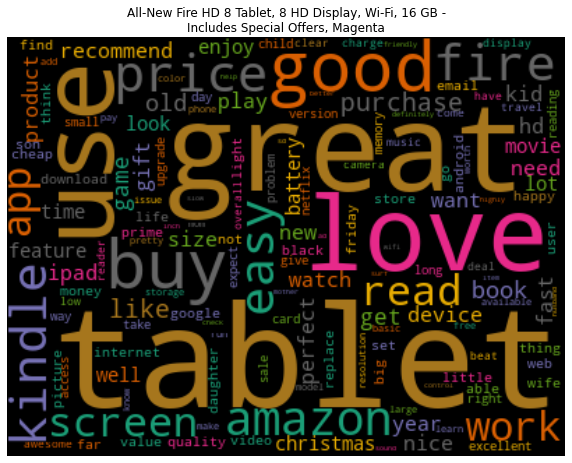

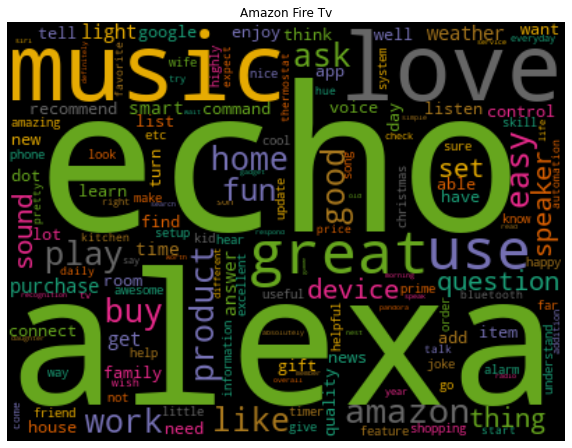

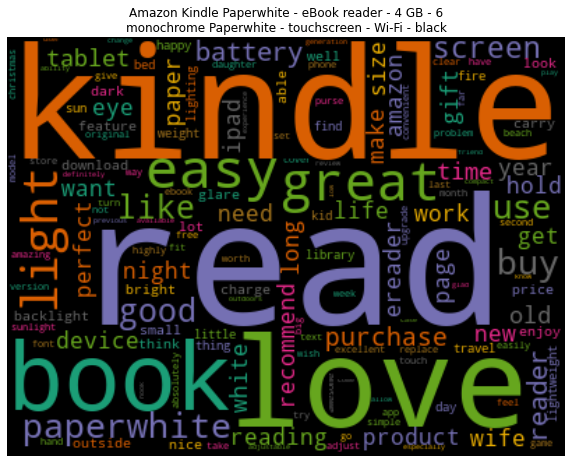

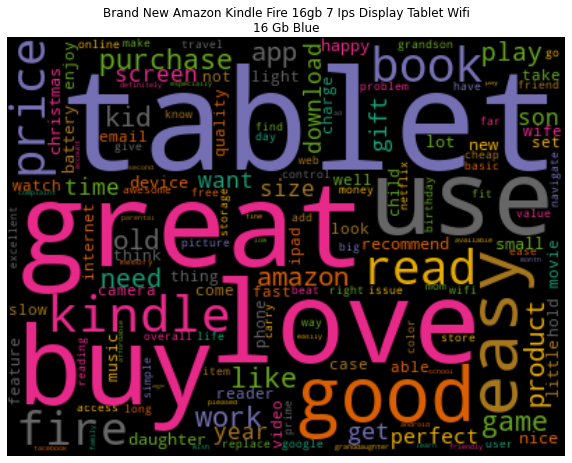

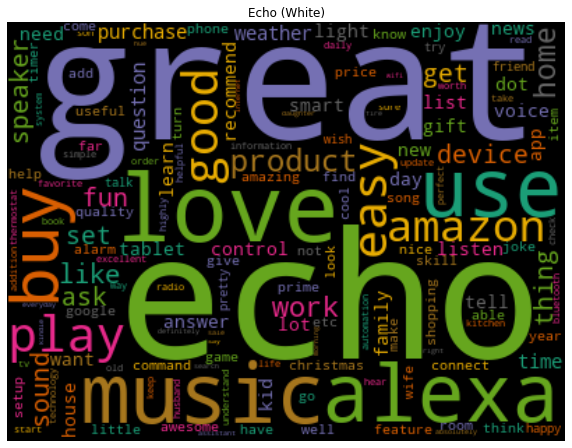

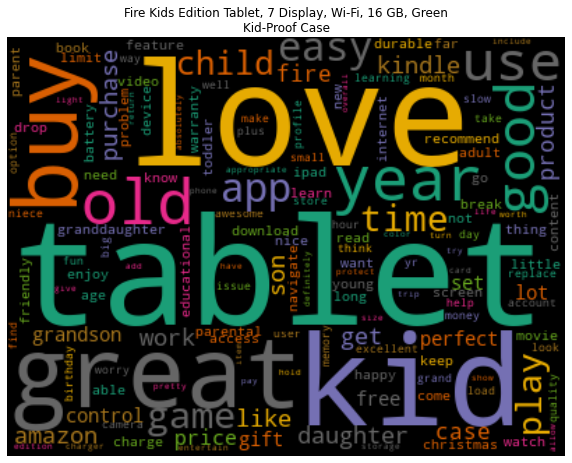

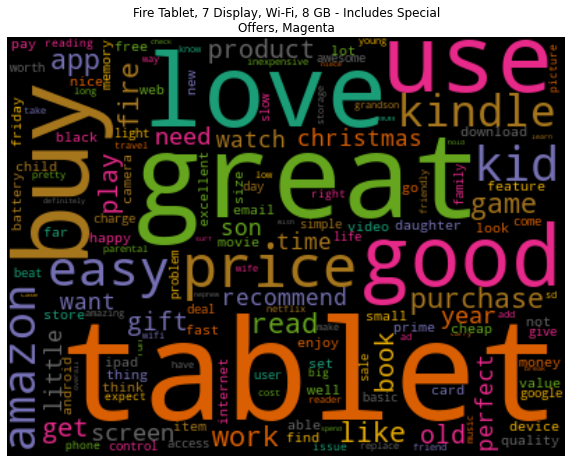

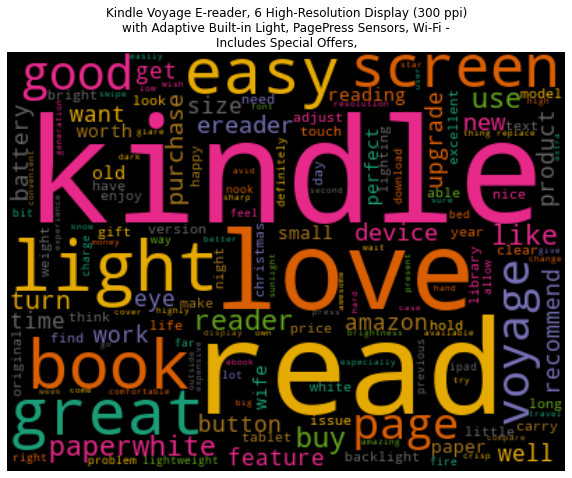

In [56]:
# Plotting word cloud for each product
for index, product in enumerate(product_review_df_dtm.columns):
  generate_word_cloud(product_review_df_dtm[product].sort_values(ascending = False), product)

Here, we can see that words like **LOVE**, **USE**, **BUY**, **GREAT**, and **EASY** are the **most frequently occurring words for almost every product**. **This means that users are loving products from Amazon** and **found purchasing them a great decision**. They also **found them easy to use**.

That’s a quick way to generate insights from text data.

Now, what if **Amazon wants to dig deeper into this and wants to know which products they should improve**?

 We can find the answer to this question by doing **a sentiment analysis of the reviews for each product**. ***Sentiment analysis is the analysis of how much a piece of text is positive and opinionated***. 

Here, in this case, **checking only the polarity**, i.e., **how much a text is positive or negative**, is sufficient. We can check the polarity of a review using the **TextBlob** **library in Python**:

In [57]:
from textblob import TextBlob
product_review_df['polarity'] = product_review_df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

Let's take a look at some of the most positive and most negative reviews.

In [58]:
print("3 Random Reviews with Highest Polarity:")
for index, review in enumerate(product_review_df.iloc[product_review_df['polarity'].sort_values(ascending = False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index + 1), review)

3 Random Reviews with Highest Polarity:
Review 1:
 This is an excellent product to give as a gift, one of the most reliable brands in the market.
Review 2:
 My Fire Kindle is wonderful and I use it all the time.
Review 3:
 Perfect for Home Automation and Wireless Entertainment.


In [59]:
print("3 Random Reviews with Lowest Polarity:")
for index, review in enumerate(product_review_df.iloc[product_review_df['polarity'].sort_values(ascending = True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index + 1), review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 2:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 3:
 I really like the Paperwhite, it made me want to read books on my Kindle again. Try it if you hate it, return it, but get your hands on this for a while, and I am convinced you will keep it.


## **Product Reviews: Plotting**

Let us plot polarities of reviews for each product and compare them. 
A bar graph is best suited for this purpose.

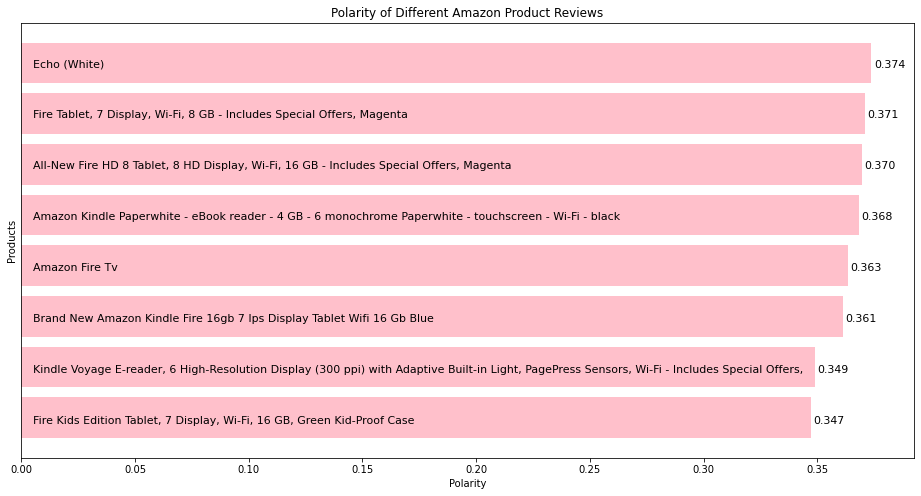

In [60]:
product_polarity_sorted = pd.DataFrame(product_review_df.groupby('name')['polarity'].mean().sort_values(ascending = True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph = plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color = 'pink',)

# Writing product names on bar
for bar, product in zip(polarity_graph, product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product), va='center',fontsize=11,color='black')

# Writing polarity values on graph
for bar, polarity in zip(polarity_graph, product_polarity_sorted['polarity']):
  plt.text(bar.get_width() + 0.001,bar.get_y() + bar.get_width(),'%.3f'%polarity,va = 'center',fontsize = 11,color = 'black')
  
plt.yticks([])
plt.show()

It can be seen that according to the polarity of reviews, **Amazon needs to improve Fire Kids Edition Tablet and Kindle Voyage E-reader**. 

Let’s also take a look at the **number of reviewers who recommended a particular product**. For this, we can take the percentage of reviewers and plot that.

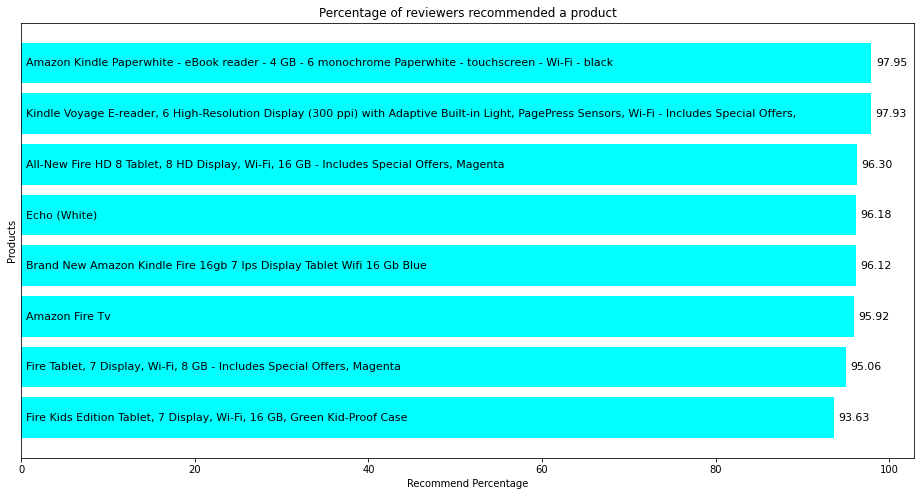

In [61]:
recommend_percentage = pd.DataFrame(((product_review_df.groupby('name')['reviews.doRecommend'].sum()*100)/product_review_df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending = True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph = plt.barh(np.arange(len(recommend_percentage.index)), recommend_percentage['reviews.doRecommend'],color = 'cyan')

# Writing product names on bar
for bar, product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y() + 0.4,'{}'.format(product),va = 'center',fontsize = 11,color = 'black')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize = 11,color = 'black')

plt.yticks([])
plt.show()

Here, we can see that the **Fire Kids Edition Tablet has the lowest recommendation percentage**. **It’s reviews also have the lowest polarity**. *So, we can say that the polarity of reviews affects the chances of a product getting recommended*.

Another thing that we can look at is the ***readability of reviews upvoted as helpful by others***. The readability of a text document can be checked using various readability indices like **Flesch Reading Ease, Dale Chall Readability Score, and Gunning Fog Index**.

For this, we can use the **textstat library in Python**. **Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document**.

In [62]:
!pip install textstat

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 3.0MB 9.9MB/s 


In [63]:
import textstat

In [64]:
product_review_df['dale_chall_score'] = product_review_df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))

In [65]:
product_review_df['flesh_reading_ease'] = product_review_df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))

In [66]:
product_review_df['gunning_fog'] = product_review_df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

In [68]:
print('Dale Chall Score of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

Dale Chall Score of upvoted reviews: 6.148739837398377
Dale Chall Score of not upvoted reviews: 5.695477993940365


In [69]:
print('Flesch Reading Score of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

Flesch Reading Score of upvoted reviews: 81.98257113821124
Flesch Reading Score of not upvoted reviews: 84.8586581087524


In [70]:
print('Gunning Fog Index of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Gunning Fog Index of upvoted reviews: 7.980264227642276
Gunning Fog Index of not upvoted reviews: 6.8617784244936715


Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the **text_standard() function** that uses *various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely*.

In [71]:
product_review_df['text_standard'] = product_review_df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',product_review_df[product_review_df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',product_review_df[product_review_df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


This seems very interesting: Both **upvoted** and **not upvoted reviews** are **easily understandable by anyone who has completed the 5th or 6th grade in school**.

Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. 

An **average adult reads about 250 words per minute**. We can also calculate the reading time of a document using the **textstat library**. It provides the **reading_time()** function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [73]:
product_review_df['reading_time'] = product_review_df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews:',product_review_df[product_review_df['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews: 3.4542174796747958
Reading Time of not upvoted reviews: 1.7917397544251397


In [75]:
product_review_df.head(3)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned,lemmatized,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,text_standard,reading_time
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed my ch...,product far disappoint child love use like abi...,0.30,7.81,74.69,9.84,6th and 7th grade,1.72
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person bough...,great beginner experience person buy gift love,0.65,6.24,81.29,8.51,3rd and 4th grade,0.91
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrill ...,0.00,1.25,92.12,6.74,3rd and 4th grade,1.56


Surprisingly, the **reading time of upvoted reviews is twice that of not upvoted reviews.** It means that people usually find longer reviews helpful.

## **Conclusion on the EDA from the Text Data**

1. **Customers love products from Amazon**. They find them a great purchase and easy to use.
2. Amazon definitely needs to work on the **Fire Kids Edition Tablet** because **it has the most negative reviews**. It is also the **least recommended product**.
3. The **majority of reviews are written in simple English** and are easily understandable by anyone who has achieved 5th or 6th grade of school or more.
4. The reading time of helpful reviews is twice that of non-helpful reviews which means **people find longer reviews helpful**.

**Additional References:**

1. Lambda Functions: https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/
2. Effective Text Data Cleaning: https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/
3. Regular Expressions: https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/
4. Extracting Information from Reports: https://www.analyticsvidhya.com/blog/2017/03/extracting-information-from-reports-using-regular-expressons-library-in-python/
5. 4 Applications of Regular Expreesions: https://www.analyticsvidhya.com/blog/2020/01/4-applications-of-regular-expressions-that-every-data-scientist-should-know-with-python-code/
5. Stopwords: https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
6. SpaCy: https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/
7. Bag of Words Model & TF-IDF (Document Term Matrix): https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
8. Word clouds: https://amueller.github.io/word_cloud/index.html
9. Twitter Sentiment Analysis: https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
10. Python Graphs: https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/
11. Textstat: https://pypi.org/project/textstat/
11. Flesch–Kincaid readability tests: https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests